# Линейная регрессия
Линейная регрессия - очень хорошо изученный метод анализа данных, позволяющий описывать значения целевой переменной в виде линейной комбинации зависимых переменных. Оптимальные (в смысле минимальности некоторого функционала ошибки) параметры линейной регрессии можно найти аналитически с помощью нормального уравнения или численно с помощью методов оптимизации.

_Этот термин в статистике впервые был использован Френсисом Гальтоном (1886) в связи с исследованием вопросов наследования физических характеристик человека. В качестве одной из характеристик был взят рост человека; при этом было обнаружено, что в целом сыновья высоких отцов, что не удивительно, оказались более высокими, чем сыновья отцов с низким ростом. Более интересным было то, что разброс в росте сыновей был меньшим, чем разброс в росте отцов. Так проявлялась тенденция возвращения роста сыновей к среднему (regression to mediocrity), то есть «регресс»._

Итак, мы хотим объяснить целевую переменную с помощью каких-то других, будем называть их зависимыми переменными: 

$$ y = a + b_1x_1+b_2x_2+b_3x_3+\dots$$

 
 Как будет выглядеть уравнение относительно первого примера?
 
 Начнем с простого случая, регрессия с одной переменной:
 
 $Y = a+b*x +\varepsilon$
 
Здесь появился еще один параметр $\varepsilon - $ ошибки модели. Про них можно думать разными способами: есть какая-то истинная зависимость, но мы имеем всегда дело с измерениями, и в них могут содержаться ошибки, поэтому эти ошибки мы явно добавляем в модель. Второй способ: никакой истины в мире не существует, всегда есть неопределенность, эта неопределенность и будет жить в этой переменной.

## Почему она так популярна?
Потому что после того, как вы оценили модель, вы можете рассказывать "историю" про вашу целевую переменную. И понимать лучше как она устроена и как область, которую вы изучаете устроена

## Подходы к анализу данных

### Объяснить значит понять, от модели к данным
Когда говорят про анализ данных, то могут подразумевать совсем разные вещи. В том, случае когда вы хотите что-то понять про процессы (политология, антропология, когнитивные науки) вы в первую очередь задаете вопросы и формулируете гипотезы, а дальше ищете им подтверждение.

 - А зависит ли успешность компании от бюджета?
 - А если да, то насколько сильно?
 - А насколько эффективна мотивация деньгами?
 - А как влияют на желание принять рисковонное решение те или иные факторы?
 - А как политическая система влияет на уровень коррупции? 
 
В любом случае, вы сначала строите "картину мира", а потом сверяете ее с наблюдениями. Даже если вы можете объяснить только часть, уже хорошо.
 
### Уметь предсказать
Если вам знакомо словосочетание "машинное обучение", то там как правило задача ставится по другому: на основе имеющихся данных сделать как можно более точный прогноз. Рекламной компании может быть абсолютно все равно как у вас устроена модель, но если вы можете сделать точный прогноз оттока или притока покупателей, на основе тех данных и метрик, которые у них есть - уже отлично. При торговле на бирже, если вы придумали алгоритм, который вам позволяет стабильно зарабатывать, то совершенно не важно, что у него там внутри. Если вы прогнозируете магнитные бури и землятресения, то гораздо важнее делать точный прогноз, чем уметь проинтерпретировать, что на что влияет.


## А мы где?
А мы хотим понимать, поэтому наш основной инструмент. - линейные модели


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
import seaborn as sns
sns.set(style="whitegrid")
import pingouin as pg
import warnings
import os
warnings.filterwarnings("ignore")
%matplotlib inline

### Пример (искусственный)


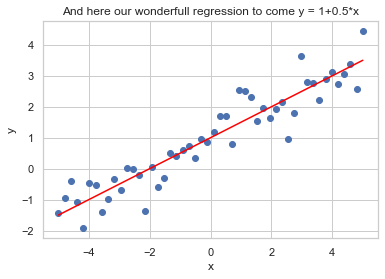

In [2]:
x=  np.linspace(-5,5,50)
a = 1
b = 0.5
eps = np.random.randn(50)
y = a + b*x + 0.5*eps
plt.scatter(x,y); plt.plot(x, a+b*x, color = 'red');
plt.title(f'And here our wonderfull regression to come y = {a}+{b}*x');
plt.xlabel('x');
plt.ylabel('y');

## Оценка параметров

Как оценивать параметры такой модели? На рисунке видим, что точки не совпадают с истинной прямой. Разница между реальным ответов и ответом модели называется ошибкой. Чем меньше сумма ошибок по всем примерам - тем лучше. Математически это записывается в виде так называемой функции потерь:
 $$L(a,b) = \sum_{i=1}^n {(y_i - \sum_i a_i+b_i * x_i)}^2  $$
 
То что стоит в формуле - это сумма квадратов и мы хотим чтобы эта сумма была как можно меньше, то есть как можно точнее модель предсказывала значения. Именно поэтому метод оценки называется метод наименьших квадратов. Для этого метода, для линейной модели существует аналитическое решение. Когда вы увидите ordinary least squares (OLS) regression - это оно и есть  

##  Как считать

Для линейной модели существует большое количество пакетов. Все они умеют оценивать параметры и способ оценки одинаковые, но помимо оценок параметров можно еще возвращать результаты проверки гипотез (в данном случае это равенство нулю коэффициента), разные метрики качества модели. Большое количество статистических проверок возвращает пакет statsmodels, очень похож на анализ, который очень похож на язык R. Мы посмотрим здесь его и реализацию из уже знакомого pinqouin, который на самом деле тоже основан на нем, но рисует более компактные и красивые выводы. Еще посмотрим супер популярную библиотеку машинного обучения sklearn.
Итак, делаем анализ в:
 - sklearn
 - pingouin
 - statsmodels
 
 
## Оценка качества регрессии: R-squared

 $$R^2$$

У нас есть уже показатель, который мы хотим минимизировать и понимаем как оценивать качество, но сумма отклонений очень зависит от данных, а хочется оперировать какой-то нормированной величиной. Такая величина называется $R^2$

$$R^2 = 1 - \frac{\sum_i(y-y_{pred})^2}{\sum_i(y-y_{mean})^2} = 1 - \frac{SS_{res}}{SS_{tot}}$$

 - и какой смысл?
 - каким может быть показатель?
 - какой он в лучшем случае?
 - какой в худшем?

In [3]:
print('Linear model with sklearn')
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
print(f'Истинные параметры: intercept:{a},coeff {b}')
lm.fit(x[:,np.newaxis],y[:,np.newaxis])
print(f'Intercept {lm.intercept_[0]:.2f},coeff {lm.coef_[0][0]:.2f}, r-squared {lm.score(x[:,np.newaxis],y[:,np.newaxis]):.2f}')

Linear model with sklearn
Истинные параметры: intercept:1,coeff 0.5
Intercept 1.00,coeff 0.49, r-squared 0.88


In [4]:
print('Linear model with pingouin')
lm = pg.linear_regression(x, y)
print(f'Истинные параметры: intercept:{a},coeff {b}')
print('Видим, что здесь еще выводятся доверительные интервалы, ошибка,\n p-value (тестируется гипотеза о равенстве коэффициента нулю')
lm.round(2)

Linear model with pingouin
Истинные параметры: intercept:1,coeff 0.5
Видим, что здесь еще выводятся доверительные интервалы, ошибка,
 p-value (тестируется гипотеза о равенстве коэффициента нулю


,names,coef,se,T,pval,r2,adj_r2,CI[2.5%],CI[97.5%]
0,Intercept,1.00,0.08,12.84,0.0,0.88,0.88,0.85,1.16
1,x1,0.49,0.03,18.66,0.0,0.88,0.88,0.44,0.55


In [5]:
r = pg.corr(y, x).round(3)
print(f'Для линейной регрессии с одной переменной r2 равен коэффициенту корреляции в квадрате {r.r**2}')

Для линейной регрессии с одной переменной r2 равен коэффициенту корреляции в квадрате pearson    0.877969
Name: r, dtype: float64


In [6]:
print('А теперь попробуем  комбайн, но в него надо отдавать дата фрейм')
df_sim = pd.DataFrame(np.concatenate([x[:,np.newaxis],y[:,np.newaxis]], axis=1), columns=['x','y'])
df_sim.head()

А теперь попробуем  комбайн, но в него надо отдавать дата фрейм


,x,y
0,-5.000000,-1.428900
1,-4.795918,-0.963664
2,-4.591837,-0.388336
3,-4.387755,-1.084380
4,-4.183673,-1.931085


In [7]:
import statsmodels.formula.api as smf

In [8]:
lm=smf.ols(formula="y ~ x", data=df_sim).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.879
Model:                            OLS   Adj. R-squared:                  0.876
Method:                 Least Squares   F-statistic:                     348.3
Date:                Sun, 18 Oct 2020   Prob (F-statistic):           1.21e-23
Time:                        21:02:57   Log-Likelihood:                -40.244
No. Observations:                  50   AIC:                             84.49
Df Residuals:                      48   BIC:                             88.31
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.0032      0.078     12.844      0.0

##  Как читать эту таблицу

В основе оценки линейной регрессии лежат предположения о структуре предикторов и таргета.
 - Все данные должны быть числовые, величина может быть категориальной, но только в том случае, если категории упорядочены, или бинарной. Целевая переменная в рамках простой линейной модели должна быть непрерывной величиной, определенной на всем промежутке (часто это ограничение игнорируется) 
 - у вас предиктор должен меняться от переменной к переменной, иначе в нем нет смысла, он не помогает ничего предсказывать
 - нет пропущенной переменной, вы не забыли включить в модель главный объясняющий фактор (тут на помощь только здравый смысл)
 - однородность дисперсии
 - независимость ошибок: то есть ошибки должны быть некоррелированными нормально распределенными значениями, иначе это будет означать что вы что-то не учли в модели 
 
 
 Итак читаем табличку:
 В шапке насколько хорошо наша модель объясняет данные
   - R-squared:  чем ближе к 1 тем лучше
   - adj R-squared: он же, но скорректированный на число параметров
   - F -statistic: тестовая статистика для гипотезы, что все коэффициенты ноль, чем больше тем лучше
   - Prob( F-statistic) - p-value для этой гипотезы, чем меньше, тем лучше. Если больше 0.05 - то звоночек искать другую модель
   - Log-Likelihood: правдоподобие, насколько данные выглядят "правдоподобно" при этой модели, чем ближе к нулю, тем лучше, но для отдельно взятой модели ни о чем не говорит, если вы для одного и того, же таргета оцениваете разные модели, то надо выбирать ту, где этот параметр меньше (то есть ближе к нулю)
   - AIC,BIC -  критерии, основанные на правдоподобии, чем они меньше тем лучше
   - Omnibus - тест на нормальность остатков, хотим чтобы  Prob(Omnibus) был близким к 1, если меньше 0.05 - плохо
   - Durbin-Watson: чем ближе к 2 тем лучше, отвечает за корреляцию между значениями внутри ошибок, точнее за автокорреляцию, если от 1 до 3, то ок
   - Jarque-Bera - тестовая статистика для оценки нормальность ошибок, чем ближе к нулю, тем лучше
   - Prob(JB) - p-value для Jarque-Bera, если меньше 0.05, то вынуждены будем отвергнуть гипотезу о нормальности ошибок, и продолжать поиски хорошей модели 

## Прогноз продаж пластинок
Давайте разберем пример с продажами пластинок звукозаписывающей компании(путешествуем во времени)  (sales) в зависимости от 
 - advert - рекламный бюджет
 - airplay - число раз мелодии из альбома звучали в эфире за неделю до продажи
 - привлекательность группу (от 0 до 10)

In [56]:
sales = pd.read_csv('datasets/AlbumSales.dat', sep = '\t')
sales.head()

,adverts,sales,airplay,attract
0,10.256,330,43,10
1,985.685,120,28,7
2,1445.563,360,35,7
3,1188.193,270,33,7
4,574.513,220,44,5


### Визуальный анализ данных
О чем нам говорят эти графики?

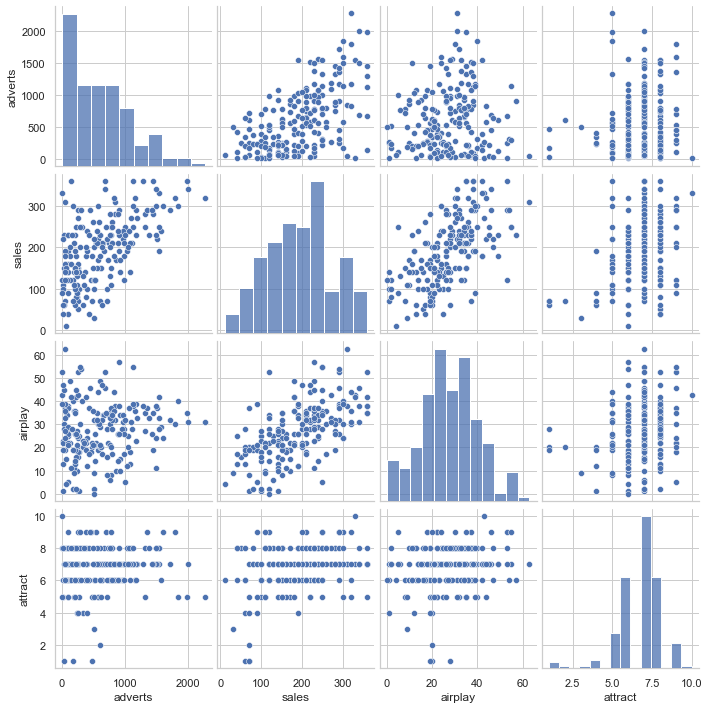

In [15]:
sns.pairplot(sales)

In [57]:
lm=smf.ols(formula="sales ~ adverts", data=sales).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.335
Model:                            OLS   Adj. R-squared:                  0.331
Method:                 Least Squares   F-statistic:                     99.59
Date:                Sun, 18 Oct 2020   Prob (F-statistic):           2.94e-19
Time:                        22:46:22   Log-Likelihood:                -1120.7
No. Observations:                 200   AIC:                             2245.
Df Residuals:                     198   BIC:                             2252.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    134.1399      7.537     17.799      0.0

Как читаем результат? Насколько хороша модель?

In [58]:
lm=smf.ols(formula="sales ~ adverts+airplay", data=sales).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.629
Model:                            OLS   Adj. R-squared:                  0.626
Method:                 Least Squares   F-statistic:                     167.2
Date:                Sun, 18 Oct 2020   Prob (F-statistic):           3.55e-43
Time:                        22:46:23   Log-Likelihood:                -1062.2
No. Observations:                 200   AIC:                             2130.
Df Residuals:                     197   BIC:                             2140.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     41.1238      9.331      4.407      0.0

In [59]:
lm=smf.ols(formula="sales ~ adverts+airplay+attract", data=sales).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.665
Model:                            OLS   Adj. R-squared:                  0.660
Method:                 Least Squares   F-statistic:                     129.5
Date:                Sun, 18 Oct 2020   Prob (F-statistic):           2.88e-46
Time:                        22:46:23   Log-Likelihood:                -1052.2
No. Observations:                 200   AIC:                             2112.
Df Residuals:                     196   BIC:                             2126.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -26.6130     17.350     -1.534      0.1

Давайте теперь проговорим как читать эти коэффициенты

In [60]:
from sklearn.preprocessing import StandardScaler,QuantileTransformer

In [61]:
scaler = StandardScaler()
for col in ['airplay','adverts','attract']:
    sales['sc_'+col] = scaler.fit_transform(pd.DataFrame(sales[col]))
sales    

,adverts,sales,airplay,attract,sc_airplay,sc_adverts,sc_attract
0,10.256,330,43,10,1.266457,-1.247124,2.320740
1,985.685,120,28,7,0.040853,0.766396,0.165254
2,1445.563,360,35,7,0.612802,1.715695,0.165254
3,1188.193,270,33,7,0.449388,1.184422,0.165254
4,574.513,220,44,5,1.348163,-0.082362,-1.271737
...,...,...,...,...,...,...,...
195,910.851,190,26,7,-0.122560,0.611921,0.165254
196,888.569,240,14,6,-1.103043,0.565926,-0.553241
197,800.615,250,34,6,0.531095,0.384367,-0.553241
198,1500.000,230,11,8,-1.348163,1.828067,0.883749


In [62]:
lm=smf.ols(formula="sales ~ sc_adverts+sc_airplay+sc_attract", data=sales).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.665
Model:                            OLS   Adj. R-squared:                  0.660
Method:                 Least Squares   F-statistic:                     129.5
Date:                Sun, 18 Oct 2020   Prob (F-statistic):           2.88e-46
Time:                        22:46:38   Log-Likelihood:                -1052.2
No. Observations:                 200   AIC:                             2112.
Df Residuals:                     196   BIC:                             2126.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    193.2000      3.330     58.025      0.0

А как читать эту модель? И в чем разница?

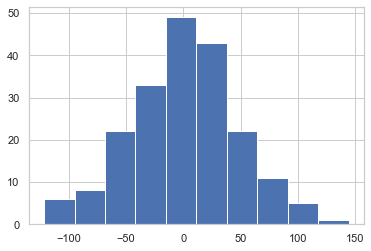

In [75]:
plt.hist(lm.resid);